# Forest Fire Prediction

### Data Description and Cleaning

Import Libraries

In [1000]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import warnings
warnings.filterwarnings("ignore")

Import Dataset

In [1001]:
df = pd.read_csv('ForestFire.csv')
df['Fire Occurrence'] = df['Fire Occurrence'].replace([0,1],['Safe','Fire'])

DataFrame Shape

In [1002]:
df.shape

(39, 5)

Sample

In [1003]:
df.sample(5)

,Area,Oxygen,Temperature,Humidity,Fire Occurrence
37,Hanoi,0,30,0,Safe
8,Ecuador,60,32,19,Fire
34,Seoul,30,51,2,Fire
15,Cairo,80,4,68,Safe
19,Amsterdam,26,0,32,Safe


Description

In [1004]:
df.describe()

,Oxygen,Temperature,Humidity
count,39.000000,39.000000,39.000000
mean,33.846154,33.794872,36.282051
std,23.734872,16.225677,28.046905
min,0.000000,0.000000,0.000000
25%,11.500000,20.000000,13.500000
50%,30.000000,35.000000,30.000000
75%,50.000000,45.000000,62.500000
max,89.000000,60.000000,100.000000


NaN Value Count

In [1005]:
df.isnull().sum()

Area               0
Oxygen             0
Temperature        0
Humidity           0
Fire Occurrence    0
dtype: int64

###### Hence no missing value analysis required

DataFrame Split

In [1006]:
X = df
Y = df['Fire Occurrence']
X.drop(['Area','Fire Occurrence'],inplace=True,axis=1)

### Train-Test Split

In [1007]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=42)

### Exploratory Analysis

Correlation Analysis

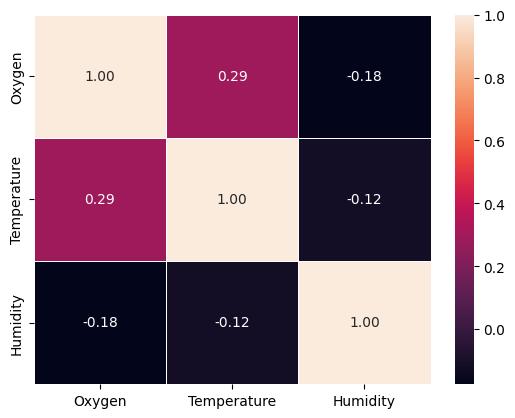

In [1008]:
sb.heatmap(X.corr(method='pearson'), xticklabels=X.corr().columns, yticklabels=X.corr().columns,annot=True,fmt=".2f",linewidth=.5)
plt.show()

### Model Building

In [1009]:
em = pd.DataFrame(columns = ['Model Name','Accuracy','Precision','Recall','F1 Score'])

#### K-Neighbors Classifier

In [1010]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

best_model = (None,0)
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train,Y_train.ravel())
Y_predict = model.predict(X_test)
print(f"Predicted Accuracy: {accuracy_score(Y_test, Y_predict).round(3)*100}%")
if accuracy_score(Y_test, Y_predict) > best_model[1]:
    best_model = (model,accuracy_score(Y_test, Y_predict))

em.loc[len(em)] = ['KNN',accuracy_score(Y_test, Y_predict),precision_score(Y_test,Y_predict,average='weighted'),recall_score(Y_test,Y_predict,average='weighted'),f1_score(Y_test,Y_predict,average='weighted')]

Predicted Accuracy: 75.0%


Prediction

In [1011]:
import numpy as np
arr = np.array([[25,56,79]])
print(model.predict(arr))

['Fire']


Confusion Matrix

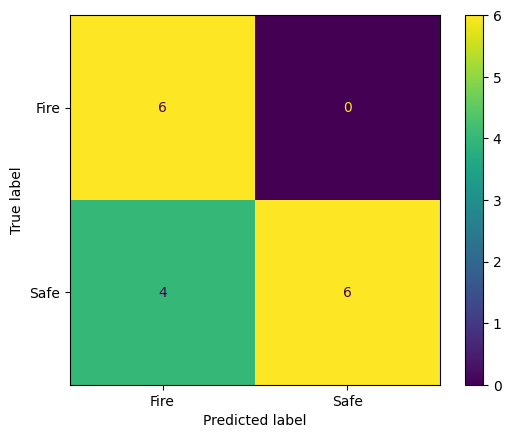

In [1012]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test, Y_predict,labels=model.classes_)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = model.classes_)
cm_display.plot()
plt.show()

#### Logistic Regression

In [1013]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,Y_train)
Y_predict = model.predict(X_test)
print(f"Predicted Accuracy: {accuracy_score(Y_test, Y_predict).round(3)*100}%")
if accuracy_score(Y_test, Y_predict) > best_model[1]:
    best_model = (model,accuracy_score(Y_test, Y_predict))
em.loc[len(em)] = ['Logistic Regression',accuracy_score(Y_test, Y_predict),precision_score(Y_test,Y_predict,average='weighted'),recall_score(Y_test,Y_predict,average='weighted'),f1_score(Y_test,Y_predict,average='weighted')]

Predicted Accuracy: 100.0%


Predict

In [1014]:
import numpy as np
arr = np.array([[25,56,79]])
print(model.predict(arr))

['Fire']


Confusion Matrix

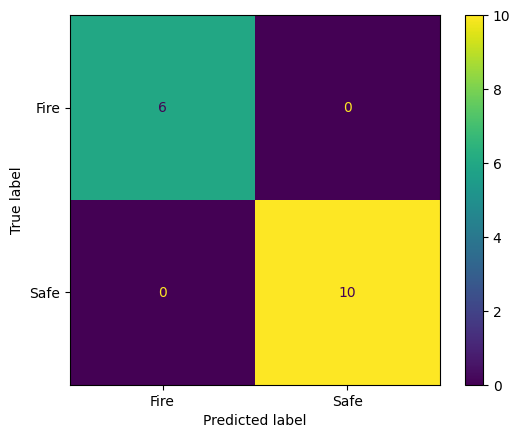

In [1015]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test, Y_predict,labels=model.classes_)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = model.classes_)
cm_display.plot()
plt.show()

#### Decision Tree Classifier

In [1016]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()
model.fit(X_train,Y_train)
Y_predict = model.predict(X_test)
print(f"Predicted Accuracy: {accuracy_score(Y_test, Y_predict).round(3)*100}%")
if accuracy_score(Y_test, Y_predict) > best_model[1]:
    best_model = (model,accuracy_score(Y_test, Y_predict))
em.loc[len(em)] = ['Decision Tree',accuracy_score(Y_test, Y_predict),precision_score(Y_test,Y_predict,average='weighted'),recall_score(Y_test,Y_predict,average='weighted'),f1_score(Y_test,Y_predict,average='weighted')]

Predicted Accuracy: 87.5%


Predict

In [1017]:
import numpy as np
arr = np.array([[25,56,79]])
print(model.predict(arr))

['Fire']


Decision Tree Plot

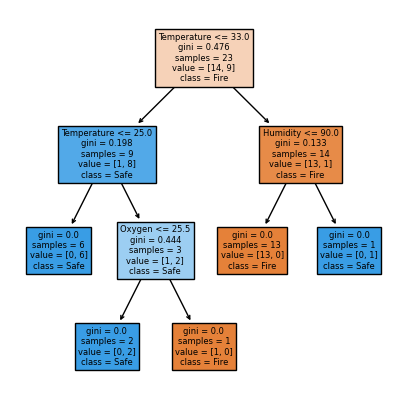

In [1018]:
from sklearn.tree import plot_tree
plt.figure(figsize=(5,5))
plot_tree(model,feature_names=X.columns,class_names=model.classes_,filled=True)
plt.show()

Confusion Matrix

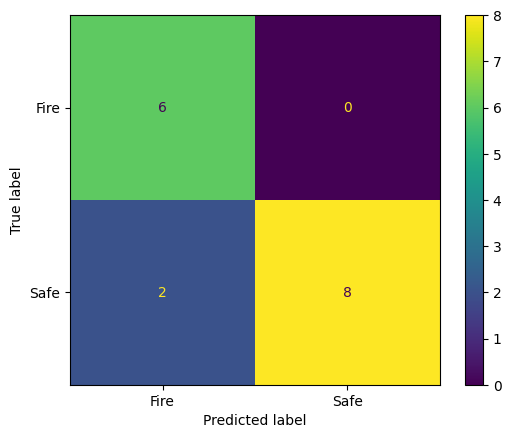

In [1019]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test, Y_predict,labels=model.classes_)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = model.classes_)
cm_display.plot()
plt.show()

#### Random Forest Classifier

In [1020]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=200)
model.fit(X_train,Y_train.ravel())
Y_predict = model.predict(X_test)
print(f"Predicted Accuracy: {accuracy_score(Y_test, Y_predict).round(3)*100}%")
if accuracy_score(Y_test, Y_predict) > best_model[1]:
    best_model = (model,accuracy_score(Y_test, Y_predict))
em.loc[len(em)] = ['Random Forest',accuracy_score(Y_test, Y_predict),precision_score(Y_test,Y_predict,average='weighted'),recall_score(Y_test,Y_predict,average='weighted'),f1_score(Y_test,Y_predict,average='weighted')]

Predicted Accuracy: 100.0%


Predict

In [1021]:
import numpy as np
arr = np.array([[25,56,79]])
print(model.predict(arr))

['Fire']


Confusion Matrix

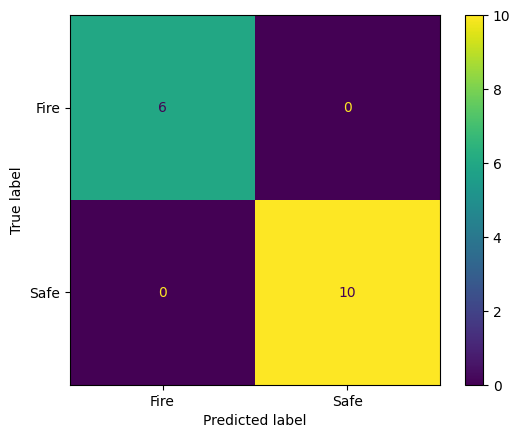

In [1022]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test, Y_predict,labels=model.classes_)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = model.classes_)
cm_display.plot()
plt.show()

#### Naive Bayes Classifier

##### Multinomial Naive Bayes

Model

In [1023]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_train = Y_train.replace(['Safe','Fire'],[0,1])
y_test = Y_test.replace(['Safe','Fire'],[0,1])
model = MultinomialNB()
model.fit(X_train,y_train)
Y_predict = model.predict(X_test)
print(f"Predicted Accuracy: {accuracy_score(y_test, Y_predict).round(3)*100}%")
if accuracy_score(y_test, Y_predict) > best_model[1]:
    best_model = (model,accuracy_score(Y_test, Y_predict))
Y_predict = pd.DataFrame(Y_predict).replace([0,1],['Safe','Fire'])
em.loc[len(em)] = ['Multinomial Naive Bayes',accuracy_score(Y_test, Y_predict),precision_score(Y_test,Y_predict,average='weighted'),recall_score(Y_test,Y_predict,average='weighted'),f1_score(Y_test,Y_predict,average='weighted')]

Predicted Accuracy: 68.8%


##### Gaussian Naive Bayes

Model

In [1024]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_train = Y_train.replace(['Safe','Fire'],[0,1])
y_test = Y_test.replace(['Safe','Fire'],[0,1])
model = GaussianNB()
model.fit(X_train,y_train)
Y_predict = model.predict(X_test)
print(f"Predicted Accuracy: {accuracy_score(y_test, Y_predict).round(3)*100}%")
if accuracy_score(y_test, Y_predict) > best_model[1]:
    best_model = (model,accuracy_score(Y_test, Y_predict))
Y_predict = pd.DataFrame(Y_predict).replace([0,1],['Safe','Fire'])
em.loc[len(em)] = ['Gaussian Naive Bayes',accuracy_score(Y_test, Y_predict),precision_score(Y_test,Y_predict,average='weighted'),recall_score(Y_test,Y_predict,average='weighted'),f1_score(Y_test,Y_predict,average='weighted')]

Predicted Accuracy: 100.0%


#### XGBoost

Model

In [1025]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_train = Y_train.replace(['Safe','Fire'],[0,1])
y_test = Y_test.replace(['Safe','Fire'],[0,1])
model = XGBClassifier()
model.fit(X_train,y_train)
Y_predict = model.predict(X_test)
print(f"Predicted Accuracy: {accuracy_score(y_test, Y_predict).round(3)*100}%")
if accuracy_score(y_test, Y_predict) > best_model[1]:
    best_model = (model,accuracy_score(Y_test, Y_predict))
Y_predict = pd.DataFrame(Y_predict).replace([0,1],['Safe','Fire'])
em.loc[len(em)] = ['XGBoost Classifier',accuracy_score(Y_test, Y_predict),precision_score(Y_test,Y_predict,average='weighted'),recall_score(Y_test,Y_predict,average='weighted'),f1_score(Y_test,Y_predict,average='weighted')]

Predicted Accuracy: 93.8%


#### Artificial Neural Network (ANN)

Model

In [1026]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

tf.random.set_seed(42)
early = EarlyStopping(monitor='loss', patience=2, mode='auto', min_delta=0.0001, restore_best_weights=True, verbose=True)

Y_train = Y_train.replace(['Safe','Fire'],[0,1])

model = Sequential()
model.add(Dense(100, input_dim=3, activation='relu'))
model.add(Dense(50, input_dim=3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['Accuracy','Precision'])
hist = model.fit(X_train, Y_train, epochs=50, batch_size=4)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - Accuracy: 0.6822 - Precision: 0.6904 - loss: 1.0963
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.6369 - Precision: 0.8955 - loss: 0.8945 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.8818 - Precision: 0.8450 - loss: 0.3127 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.8818 - Precision: 0.8450 - loss: 0.2756     
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.8337 - Precision: 0.8318 - loss: 0.2300 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.8818 - Precision: 0.8450 - loss: 0.1618 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.9222 - Precision: 0.8926 - loss: 0.1356 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.9222 - Precision: 0.8926 - loss: 0.1107 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.9222 - Precision: 0.8926 - loss: 0.0961 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.9417 - 

Training Accuracy Plot

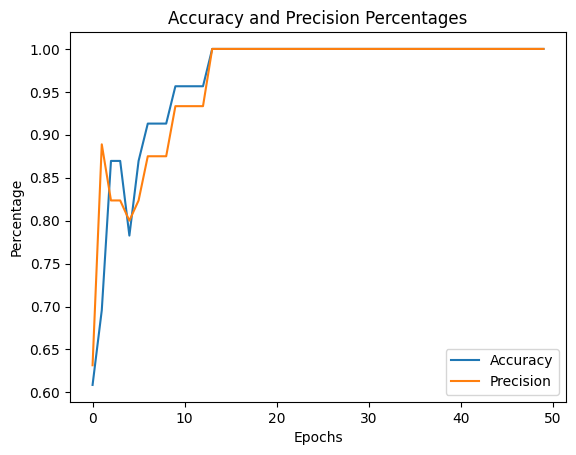

In [1027]:
plt.plot(hist.history['Accuracy'], label='Accuracy')
plt.plot(hist.history['Precision'], label='Precision')
plt.legend(loc='lower right')
plt.title('Accuracy and Precision Percentages')
plt.xlabel('Epochs')
plt.ylabel('Percentage')
plt.show()

Training Loss Plot

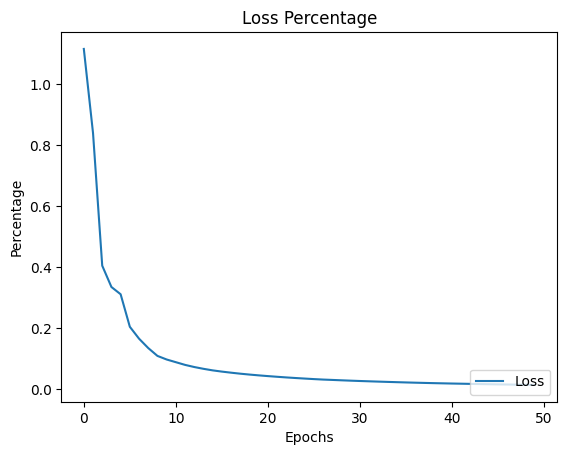

In [1028]:
plt.plot(hist.history['loss'], label='Loss')
plt.legend(loc='lower right')
plt.title('Loss Percentage')
plt.xlabel('Epochs')
plt.ylabel('Percentage')
plt.show()

Predict

In [1029]:
Y_predict = model.predict(X_test)
Y_predict = np.where(Y_predict > 0.5, 'Fire', 'Safe')
em.loc[len(em)] = ['ANN',accuracy_score(Y_test, Y_predict),precision_score(Y_test,Y_predict,average='weighted'),recall_score(Y_test,Y_predict,average='weighted'),f1_score(Y_test,Y_predict,average='weighted')]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


### Model Comparision

In [ ]:
em = em.sort_values(by='Accuracy',ascending=False).drop_duplicates(subset=['Accuracy','Precision','Recall','F1 Score'],keep='first').reset_index(drop=True)
em.index = em.index+1
em

,Model Name,Accuracy,Precision,Recall,F1 Score
1,Logistic Regression,1.0000,1.000000,1.0000,1.000000
2,Random Forest,1.0000,1.000000,1.0000,1.000000
3,Gaussian Naive Bayes,1.0000,1.000000,1.0000,1.000000
4,XGBoost Classifier,0.9375,0.946429,0.9375,0.938259
5,Decision Tree,0.8750,0.906250,0.8750,0.876984
6,KNN,0.7500,0.850000,0.7500,0.750000
7,ANN,0.7500,0.781250,0.7500,0.753968
8,Multinomial Naive Bayes,0.6875,0.700397,0.6875,0.691296


### Pickling

In [1031]:
import pickle

print("Best Model: ",best_model[0], "\nBest Accuracy: ",best_model[1])

with open('fire/model','wb') as f:
    pickle.dump(best_model[0],f)

Best Model:  LogisticRegression() 
Best Accuracy:  1.0
